# [MC920] Trabalho 2

10/05/2021

**Tiago Pereira Dall'Oca - 206341**

---

## Observações iniciais

Este trabalho foi desenvolvido utilizando a plataforma de prototipação e experimentção [Jupyter](https://jupyter.org). A intenção foi permitir que o trabalho fosse desenvolvido de forma gradual, já que as celulas são executadas uma por vez e os resultdados são obtidos de forma incremental.

Estou enviando, junto do pdf do notebook,o notebook original. A intenção é que a imagem de input pode ser alterada com bastante facilidade e basta rodar as células em sequência para obter os resultados discutidos.

In [1]:
from scipy import misc
from scipy import ndimage
from scipy.fft import ifftn
from scipy.spatial.distance import pdist
from scipy.ndimage import rotate
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Imagem escolhida

O valor de `img_file_name` pode ser modificado para o caminho de outras imagens válidas no notebook.

In [2]:
img_file_name = 'images/butterfly.png'

In [3]:
img = cv2.imread(img_file_name, cv2.IMREAD_GRAYSCALE)
img

array([[164, 157, 164, ...,  59,  57,  59],
       [148, 148, 157, ...,  57,  59,  57],
       [145, 148, 148, ...,  64,  63,  68],
       ...,
       [ 77,  77,  80, ..., 142, 140, 143],
       [ 77,  84,  77, ..., 140, 155, 146],
       [ 84,  90,  83, ..., 150, 146, 143]], dtype=uint8)

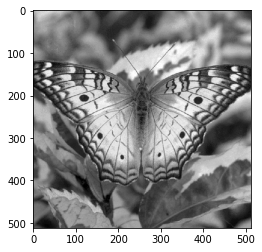

In [4]:
plt.imshow(img, 'gray')

## Aplicação da transformada discreta de Fourier

Obs: vou chamar a transformada discreta de fourier apenas de transformada de Fourier a partir daqui.

A versão do algorítmo é um 'fast Fourier transform' (fft) para duas dimensões.

Assim, obteremos o domínio de frequências da imagem original

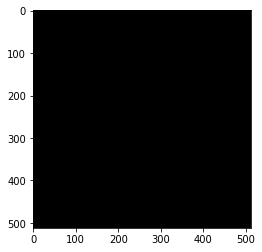

In [5]:
img_fft = np.fft.fft2(img)
plt.imshow(np.abs(img_fft), 'gray')

Para facilitar a visualização, vamos aplicar a função `log`.

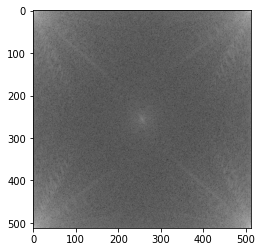

In [6]:
img_fft_log = np.log(1+np.abs(img_fft))
plt.imshow(img_fft_log, 'gray')

Agora, vamos centralizar o domínio de frequência da imagem

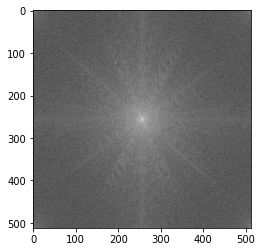

In [7]:
img_fft_shifted = np.fft.fftshift(img_fft)
img_fft_shifted_log = np.log(1+np.abs(img_fft_shifted))
plt.imshow(img_fft_shifted_log, 'gray')

A serguir, fiz um teste para obter a imagem original a partir do domínio de frequências, aplicando a inversa da transformada de Fourier

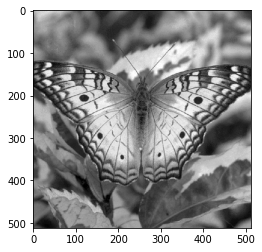

In [8]:
img_inv = np.fft.ifft2(img_fft)
plt.imshow(np.abs(img_inv), 'gray')

## Filtros

Tendo preparado já o domínio de frequências, vamos aplicas os filtros:
- passa-baixa
- passa-alta
- passa-faixa

Respectivamente:
- atenua frequências altas
- atenua frequências baixas e permite a passagem de altas frequências
- permite passagem de frequências em uma banda específica

In [9]:
def filtro(d,img_shape,i,o):
    base = np.zeros(img_shape[:2])
    rows, cols = img_shape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if pdist([[y,x],center])[0] < d:
                base[y,x] = i
            else:
                base[y,x] = o
    return base

### Passa-baixa

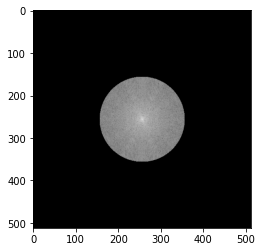

In [10]:
filtro_passa_baixo = filtro(100,img.shape,1,0)
plt.imshow(filtro_passa_baixo*img_fft_shifted_log, 'gray')

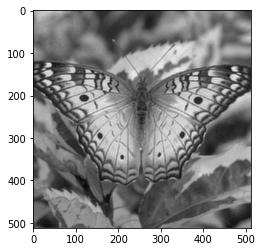

In [11]:
img_passa_baixo = np.abs(np.fft.ifft2(np.fft.ifftshift(filtro_passa_baixo*img_fft_shifted)))
plt.imshow(img_passa_baixo, 'gray')

### Passa-alta

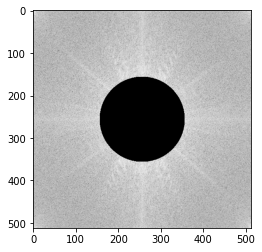

In [12]:
filtro_passa_alto = filtro(100,img.shape,0,1)
plt.imshow(filtro_passa_alto*img_fft_shifted_log, 'gray')

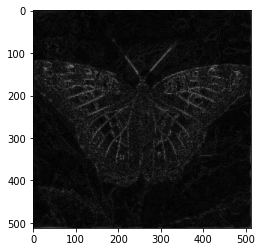

In [13]:
img_passa_alto = np.abs(np.fft.ifft2(np.fft.ifftshift(filtro_passa_alto*img_fft_shifted)))
plt.imshow(img_passa_alto, 'gray')

### Passa-faixa

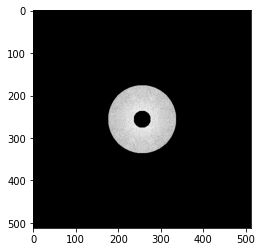

In [14]:
filtro_passa_faixa = filtro(80,img.shape,1,0)*filtro(20,img.shape,0,1)
plt.imshow(filtro_passa_faixa*img_fft_shifted_log, 'gray')

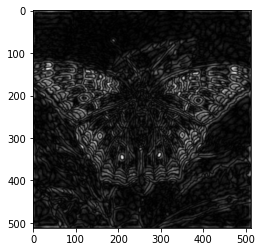

In [15]:
img_passa_baixo = np.abs(np.fft.ifft2(np.fft.ifftshift(filtro_passa_faixa*img_fft_shifted)))
plt.imshow(img_passa_baixo, 'gray')

## Compressão

A compressão foi feita zerando as frequências com magnitude menor que $-5*10^{4}$ e maior que $5*10^{4}$, sendo os valores imaginários e reais tratados separadamente.

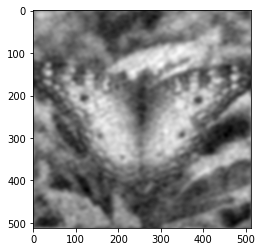

In [16]:
img_fft_compressed1 = np.copy(img_fft)
img_fft_compressed2 = np.copy(img_fft)
np.clip(img_fft_compressed1.real, 5e4, None, out=img_fft_compressed1.real)
np.clip(img_fft_compressed1.imag, 5e4, None, out=img_fft_compressed1.imag)
np.clip(img_fft_compressed2.real, None, -5e4, out=img_fft_compressed2.real)
np.clip(img_fft_compressed2.imag, None, -5e4, out=img_fft_compressed2.imag)
img_fft_compressed = img_fft_compressed1 + img_fft_compressed2
img_compressed = np.abs(np.fft.ifft2(img_fft_compressed))
plt.imshow(np.abs(img_compressed), 'gray')

## Rotação

Pode-se observar na rotação que o domínio de frequências também ficou rotacionado em relação ao domínio da imagem original.

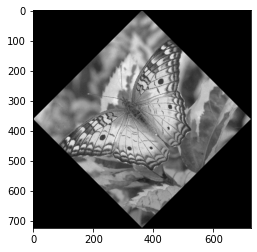

In [17]:
img_rot = rotate(img, 45)
plt.imshow(img_rot, 'gray')

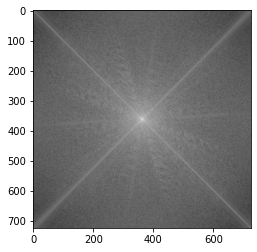

In [18]:
img_rot_fft = np.fft.fft2(img_rot)
img_rot_fft_shifted = np.fft.fftshift(img_rot_fft)
img_rot_fft_shifted_log = np.log(1+np.abs(img_rot_fft_shifted))
plt.imshow(img_rot_fft_shifted_log, 'gray')